In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [84]:
data = pd.read_csv('C:/Users/HP/Desktop/задание1/Student_Performance.csv')
print(data.head(),data.shape)
data = data.values

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0   (10000, 6)


In [85]:
le = LabelEncoder()
data[:, 2] = le.fit_transform(data[:, 2])  
X,y = data[:,:-1], data[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 1)

In [86]:
model = LinearRegression(fit_intercept = True)
model = model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9884855999665682

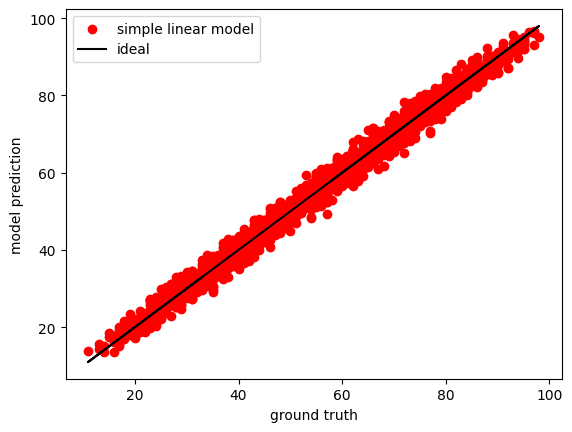

In [87]:
plt.xlabel('ground truth')
plt.ylabel('model prediction')
plt.scatter(y_test, model.predict(X_test), color = 'red', label = 'simple linear model')
plt.plot(y_test, y_test, color = 'black', label = 'ideal')
plt.legend()
plt.show()

In [88]:
#дополняем матрицу признаков и обучаем новую модель
poly = PolynomialFeatures(2, include_bias = True, interaction_only = False)
X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X),y,test_size = 0.2, shuffle = True, random_state = 1)
model = model.fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9888399475435088, 0.9884557231260868)

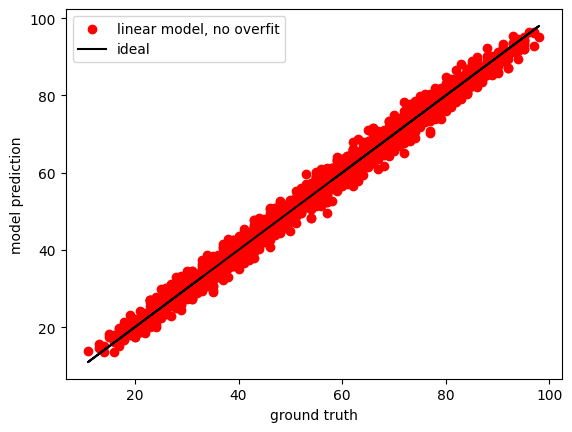

In [89]:
plt.xlabel('ground truth')
plt.ylabel('model prediction')
plt.scatter(y_test, model.predict(X_test), color = 'red', label = 'linear model, no overfit')
plt.plot(y_test, y_test, color = 'black', label = 'ideal')
plt.legend()
plt.show()

In [90]:
#еще дополняем матрицу признаков и обучаем новую модель, видим переобучение
poly = PolynomialFeatures(3, include_bias = True, interaction_only = False)
X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X),y,test_size = 0.2, shuffle = True, random_state = 1)
model = model.fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.988896261163576, 0.9883982376534224)

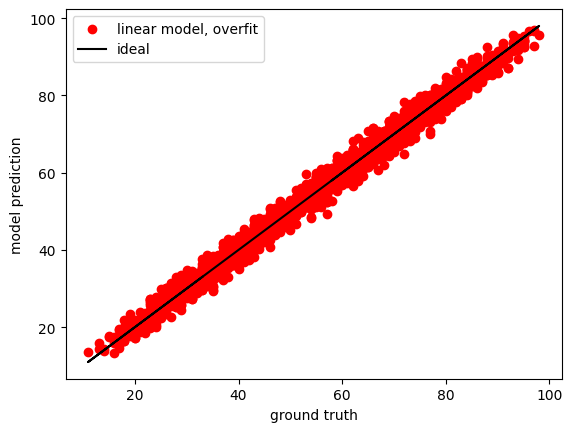

In [91]:
plt.xlabel('ground truth')
plt.ylabel('model prediction')
plt.scatter(y_test, model.predict(X_test), color = 'red', label = 'linear model, overfit')
plt.plot(y_test, y_test, color = 'black', label = 'ideal')
plt.legend()
plt.show()

In [92]:
#обучаем ту же модель с регуляризацией, лечим переобучение, но все же численный метод поиска весов не сходится
model = Lasso(alpha = 0.05, fit_intercept = True, tol = 0.01, max_iter = 100000)
model = model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test), np.count_nonzero(model.coef_)

(0.9888263939105028, 0.9884732992004184, 45)

In [93]:
#скейлинг данных, метод сходится
scale = StandardScaler(with_mean = True, with_std = True)
X_train, X_test = scale.fit_transform(X_train), scale.fit_transform(X_test)
model = model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test), np.count_nonzero(model.coef_)

(0.9888086636203156, 0.9883255383240593, 18)

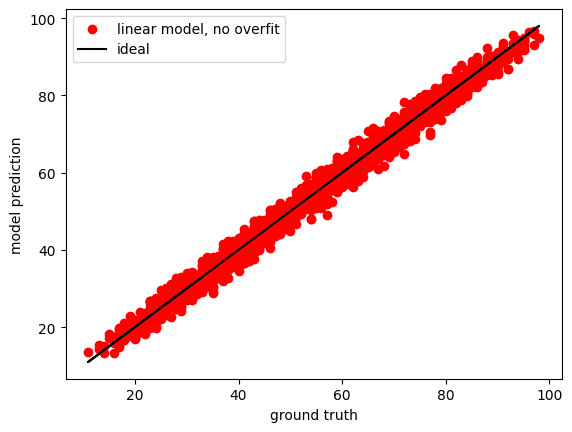

In [94]:
plt.xlabel('ground truth')
plt.ylabel('model prediction')
plt.scatter(y_test, model.predict(X_test), color = 'red', label = 'linear model, no overfit')
plt.plot(y_test, y_test, color = 'black', label = 'ideal')
plt.legend()
plt.show()

In [95]:
#подбор регуляризатора "из коробки"
model = LassoCV(fit_intercept = True, tol = 0.01, max_iter = 100000)
model = model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test), np.count_nonzero(model.coef_), model.alpha_

(0.9888203464141475, 0.9883373195681765, 18, np.float64(0.01759863828691537))

In [96]:
print(type(X))  # Проверьте тип
print(X)        # Выведите переменную, чтобы увидеть её содержимое
print(X.shape)  # Проверьте форму


<class 'numpy.ndarray'>
[[7 99 1 9 1]
 [4 82 0 4 2]
 [8 51 1 7 2]
 ...
 [6 83 1 8 5]
 [9 97 1 7 0]
 [7 74 0 8 1]]
(10000, 5)


In [97]:
data = pd.read_csv('C:/Users/HP/Desktop/задание1/Student_Performance.csv')
X = data.drop(columns=['Performance Index']).values  
print(X.shape)  


(10000, 5)


In [98]:
print(X.dtype)  
print(data.dtypes)  # Это покажет типы данных каждой колонки


object
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [99]:
data['Extracurricular Activities'] = le.fit_transform(data['Extracurricular Activities'])
X = data.drop(columns=['Performance Index']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Appliquer la standardisation
print("Средние значения характеристик до стандартизации:\n", np.mean(X, axis=0))
print("Стандартное отклонение характеристик до стандартизации:\n", np.std(X, axis=0))


Средние значения характеристик до стандартизации:
 [ 4.9929 69.4457  0.4948  6.5306  4.5833]
Стандартное отклонение характеристик до стандартизации:
 [ 2.58917933 17.34228507  0.49997296  1.69577818  2.86720441]


In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Применение стандартизации
print("Средние значения признаков после стандартизации:\n", np.mean(X_scaled, axis=0))
print("Стандартные отклонения признаков после стандартизации:\n", np.std(X_scaled, axis=0))


Средние значения признаков после стандартизации:
 [ 1.04805054e-16 -1.29674049e-16  3.26849658e-17  1.64845915e-16
 -1.29318778e-16]
Стандартные отклонения признаков после стандартизации:
 [1. 1. 1. 1. 1.]


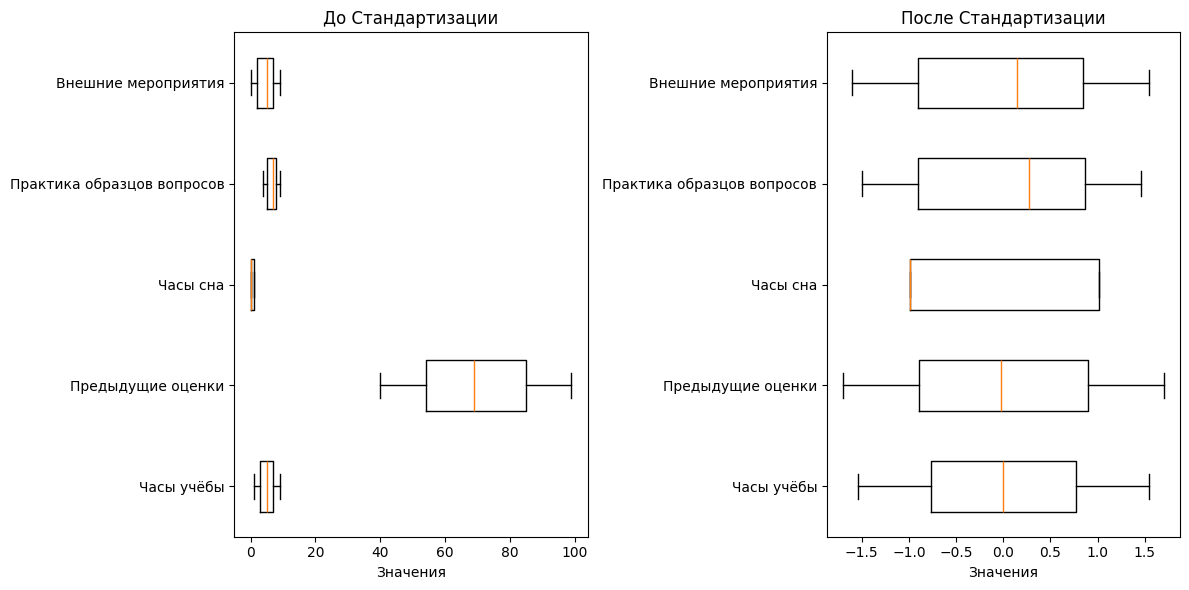

In [101]:
# Построить диаграммы размаха до и после стандартизации
plt.figure(figsize=(12, 6))

# Диаграмма размаха для значений до стандартизации
plt.subplot(1, 2, 1)
plt.boxplot(X, vert=False)
plt.title('До Стандартизации')
plt.xlabel('Значения')
plt.yticks([1, 2, 3, 4, 5], ['Часы учёбы', 'Предыдущие оценки', 'Часы сна', 'Практика образцов вопросов', 'Внешние мероприятия'])

# Диаграмма размаха для значений после стандартизации
plt.subplot(1, 2, 2)
plt.boxplot(X_scaled, vert=False)
plt.title('После Стандартизации')
plt.xlabel('Значения')
plt.yticks([1, 2, 3, 4, 5], ['Часы учёбы', 'Предыдущие оценки', 'Часы сна', 'Практика образцов вопросов', 'Внешние мероприятия'])

plt.tight_layout()
plt.show()

In [102]:
X = data.drop(columns=['Extracurricular Activities', 'Performance Index']).values
y = data['Extracurricular Activities'].values
y_encoded = le.fit_transform(y)  # Кодирование внеклассных мероприятий в числовые значения
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [103]:
model = LogisticRegression(max_iter=1000)  # Увеличьте max_iter при необходимости
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)


Точность: 0.52


In [104]:
# Exemple avec des caractéristiques combinées (termes polynomiaux)
poly = PolynomialFeatures(degree=2)  # Vous pouvez ajuster le degré
X_train_combined = poly.fit_transform(X_train)  # Combiner les caractéristiques pour l'entraînement
X_test_combined = poly.transform(X_test)  

In [105]:
model_combined = LogisticRegression(max_iter=1000)
model_combined.fit(X_train_combined, y_train)
y_pred_combined = model_combined.predict(X_test_combined)

# Comparaison des résultats
print("\nОтчет о классификации (Исходные признаки):")
print(classification_report(y_test, y_pred))  # Résultat pour les caractéristiques d'origine

print("\nОтчет о классификации (Комбинированные признаки):")
print(classification_report(y_test, y_pred_combined))  # Résultat pour les caractéristiques combinées


Отчет о классификации (Исходные признаки):
              precision    recall  f1-score   support

           0       0.52      0.67      0.58      1009
           1       0.52      0.37      0.43       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.52      0.52      0.51      2000


Отчет о классификации (Комбинированные признаки):
              precision    recall  f1-score   support

           0       0.50      0.59      0.54      1009
           1       0.48      0.39      0.43       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.49      2000



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


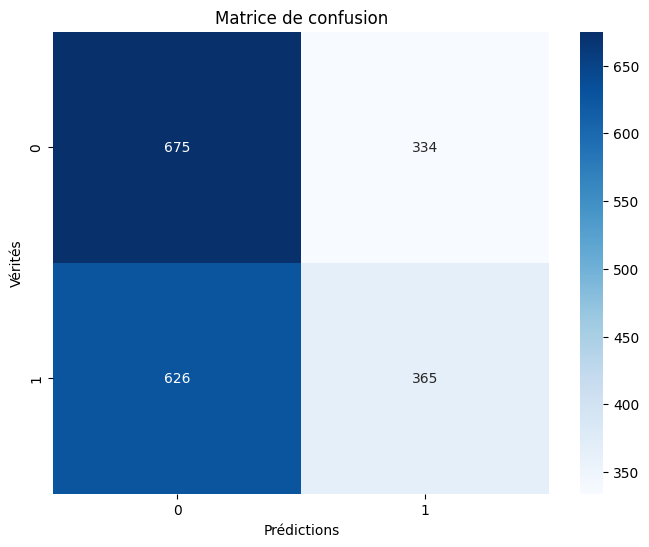

In [106]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()